# SAVANT Aerosol Lidar Visualization

In [1]:
import sys
import subprocess       # This won't work with anaconda, and do NOT recommend you to use conda
import glob # This is the system default package

import numpy as np
try:
    from matplotlib import pyplot as plt
except:
    print("The library matplotlib can't be loaded. Please wait for the installation and re-run program!")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
    

from atmospheric_lidar import raymetrics

In [2]:
file_paths = sorted(glob.glob('D:/GitHub/SAVANT-Lidar-Paraview/Aerosol/2018-10-17-18/2018-10-18-0045/R*'))
print("%s files found." % len(file_paths))

255 files found.


## Split the files in separate PPI and RHI groups

In [3]:
# Get the scan info of the first file
f = raymetrics.ScanningFile(file_paths[0], get_name_by_order=True)
previous_azimuth = f.azimuth_angle
previous_zenith = f.zenith_angle

In [4]:
file_groups = []
current_group = []

for n, file_path in enumerate(file_paths):
    f = raymetrics.ScanningFile(file_path, get_name_by_order=True, import_now=False)  # Just read the header, for faster IO
     
    if (previous_azimuth == f.azimuth_angle) or (previous_zenith == f.zenith_angle):
        current_group.append(file_path)
    else:
        file_groups.append(current_group.copy())  # This group is finished
        previous_azimuth = f.azimuth_angle
        previous_zenith = f.zenith_angle
        current_group = []
        
file_groups.append(current_group)  # Apend also the last group 

print("Total number of groups %s." %  len(file_groups))    

Total number of groups 6.


In [5]:
# Load each measurement 
scans = []
for group_paths in file_groups:
    m = raymetrics.ScanningLidarMeasurement(group_paths, get_name_by_order=True)
    scans.append(m)

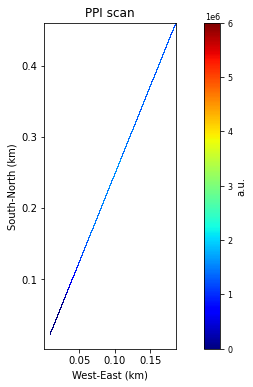

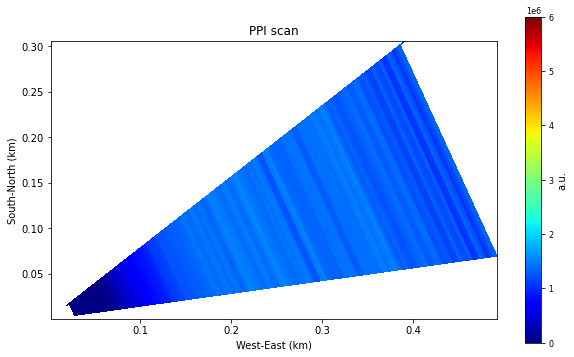

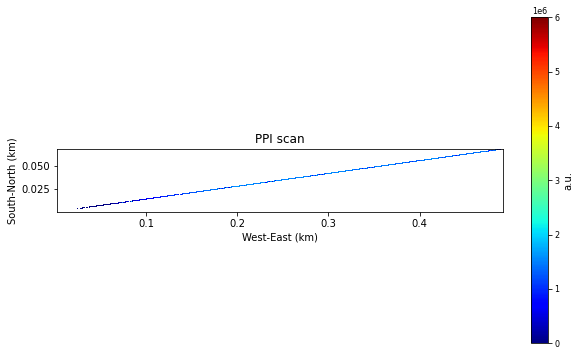

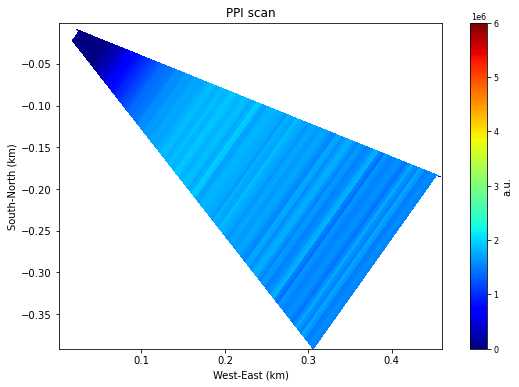

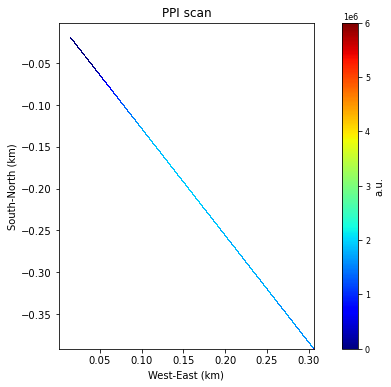

In [6]:
# Plot the PPI scans
for m in scans[1:]:  # Reject the first scan that contains only one file.
    c = m.channels[0]  # Get the measurement channel, containing data from all files
    c.plot_ppi(figsize=(10, 6),    # Size of the plots
            z_min=0,z_max=500, # Range limits
            vmin=0, vmax=6e6,   # Image limits
            mask_noise=True)   # Cut blank regions

Text(0, 0.5, 'Signal (mV)')

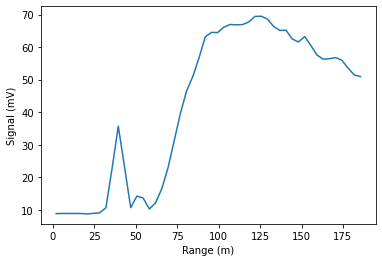

In [7]:
# Investigate the ringing of he detector
profile_idx = 40  # Number of profile ot plot
max_z_idx = 50   # Maximum range bin to plot

m = scans[1]
c = m.channels[0]
plt.plot(c.z[:max_z_idx], c.matrix[40, :max_z_idx])
plt.xlabel('Range (m)')
plt.ylabel('Signal (mV)')

In [8]:
print(np.shape(c.matrix))
np.savetxt('fuckthisshit.txt', c.rc, delimiter=',')



(49, 16380)


In [9]:
aa, bb = c._polar_to_ground(c.z / 1000., c.azimuth_angles, c.zenith_angles)
print(np.shape(c.rc))


(49, 16380)


### Now print out the keys to the dictionary of the c.data

In [10]:

for key in c.data.keys():
    print(c.data[key])

[8.87260887 8.88888889 8.80748881 ... 8.8970289  8.81562882 8.86446886]
[9.22728066 9.20111634 9.14878772 ... 9.19239491 9.17495203 9.17495203]
[9.14006628 9.17495203 9.16623059 ... 9.30577359 9.20111634 9.20983778]
[9.15750916 9.18367347 9.19239491 ... 9.18367347 9.20111634 9.17495203]
[9.14006628 9.13134485 9.16623059 ... 9.18367347 9.19239491 9.19239491]
[8.8871446  8.83481598 8.85225885 ... 8.89586604 8.83481598 8.86098029]
[9.17495203 9.18367347 9.20111634 ... 9.17495203 9.22728066 9.17495203]
[8.84818885 8.88074888 8.88888889 ... 8.86446886 8.87260887 8.88888889]
[9.20111634 9.17495203 9.10518053 ... 9.20983778 9.22728066 9.17495203]
[8.87515263 8.85989011 8.81410256 ... 8.89041514 8.94383394 8.91330891]
[9.15750916 9.20111634 9.21855922 ... 9.14878772 9.12262341 9.22728066]
[9.23076923 9.1982092  9.16564917 ... 9.22262922 9.13308913 9.15750916]
[9.20447074 9.22325538 9.18568611 ... 9.19507843 9.23264769 9.21386306]
[9.12262341 9.20111634 9.18367347 ... 9.16623059 9.19239491 9.20

In [11]:

for key in c.data.keys():
    print(c.data[key])

[8.87260887 8.88888889 8.80748881 ... 8.8970289  8.81562882 8.86446886]
[9.22728066 9.20111634 9.14878772 ... 9.19239491 9.17495203 9.17495203]
[9.14006628 9.17495203 9.16623059 ... 9.30577359 9.20111634 9.20983778]
[9.15750916 9.18367347 9.19239491 ... 9.18367347 9.20111634 9.17495203]
[9.14006628 9.13134485 9.16623059 ... 9.18367347 9.19239491 9.19239491]
[8.8871446  8.83481598 8.85225885 ... 8.89586604 8.83481598 8.86098029]
[9.17495203 9.18367347 9.20111634 ... 9.17495203 9.22728066 9.17495203]
[8.84818885 8.88074888 8.88888889 ... 8.86446886 8.87260887 8.88888889]
[9.20111634 9.17495203 9.10518053 ... 9.20983778 9.22728066 9.17495203]
[8.87515263 8.85989011 8.81410256 ... 8.89041514 8.94383394 8.91330891]
[9.15750916 9.20111634 9.21855922 ... 9.14878772 9.12262341 9.22728066]
[9.23076923 9.1982092  9.16564917 ... 9.22262922 9.13308913 9.15750916]
[9.20447074 9.22325538 9.18568611 ... 9.19507843 9.23264769 9.21386306]
[9.12262341 9.20111634 9.18367347 ... 9.16623059 9.19239491 9.20

In [12]:
aa, bb = c._polar_to_ground(c.z / 1000., c.azimuth_angles, c.zenith_angles)
print(np.shape(c.rc))


(49, 16380)


### Now print out the keys to the dictionary of the c.data

In [13]:

for key in c.data.keys():
    print(c.data[key])

[8.87260887 8.88888889 8.80748881 ... 8.8970289  8.81562882 8.86446886]
[9.22728066 9.20111634 9.14878772 ... 9.19239491 9.17495203 9.17495203]
[9.14006628 9.17495203 9.16623059 ... 9.30577359 9.20111634 9.20983778]
[9.15750916 9.18367347 9.19239491 ... 9.18367347 9.20111634 9.17495203]
[9.14006628 9.13134485 9.16623059 ... 9.18367347 9.19239491 9.19239491]
[8.8871446  8.83481598 8.85225885 ... 8.89586604 8.83481598 8.86098029]
[9.17495203 9.18367347 9.20111634 ... 9.17495203 9.22728066 9.17495203]
[8.84818885 8.88074888 8.88888889 ... 8.86446886 8.87260887 8.88888889]
[9.20111634 9.17495203 9.10518053 ... 9.20983778 9.22728066 9.17495203]
[8.87515263 8.85989011 8.81410256 ... 8.89041514 8.94383394 8.91330891]
[9.15750916 9.20111634 9.21855922 ... 9.14878772 9.12262341 9.22728066]
[9.23076923 9.1982092  9.16564917 ... 9.22262922 9.13308913 9.15750916]
[9.20447074 9.22325538 9.18568611 ... 9.19507843 9.23264769 9.21386306]
[9.12262341 9.20111634 9.18367347 ... 9.16623059 9.19239491 9.20